In [61]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

dataset = pd.read_csv('financial_data.csv')


In [62]:
# now we start the EDA process 
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [100]:
dataset.describe()
dataset.shape

(17908, 19)

In [64]:
# cleaning the Data 
dataset.isna().any()

# so we notice no column has a non value

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

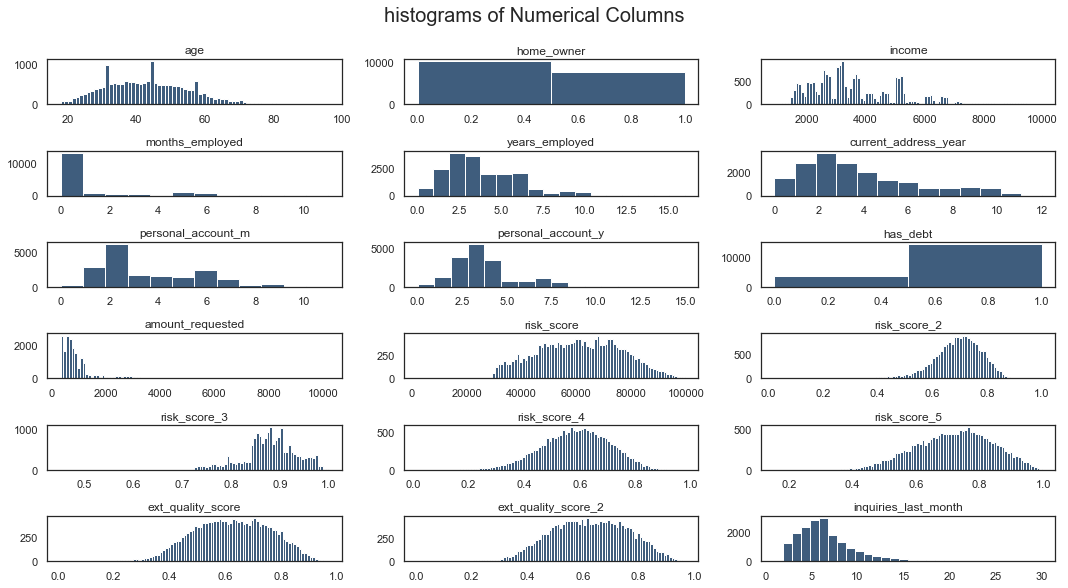

In [65]:
# Histogram 
# 1- make sure that we remove the categorical variables 
# 2- any missing value should be removed as well : this one is done 
# 3- the ones that we remove  by default are the index and the response variable 
# and then we look for the other categorical variables 


dataset2 = dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

fig= plt.figure(figsize=(15,12))
plt.suptitle('histograms of Numerical Columns',fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:,i].unique())
    if vals >=100:
        vals=100
        
    plt.hist(dataset2.iloc[:,i],bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.3,1,0.95]) 

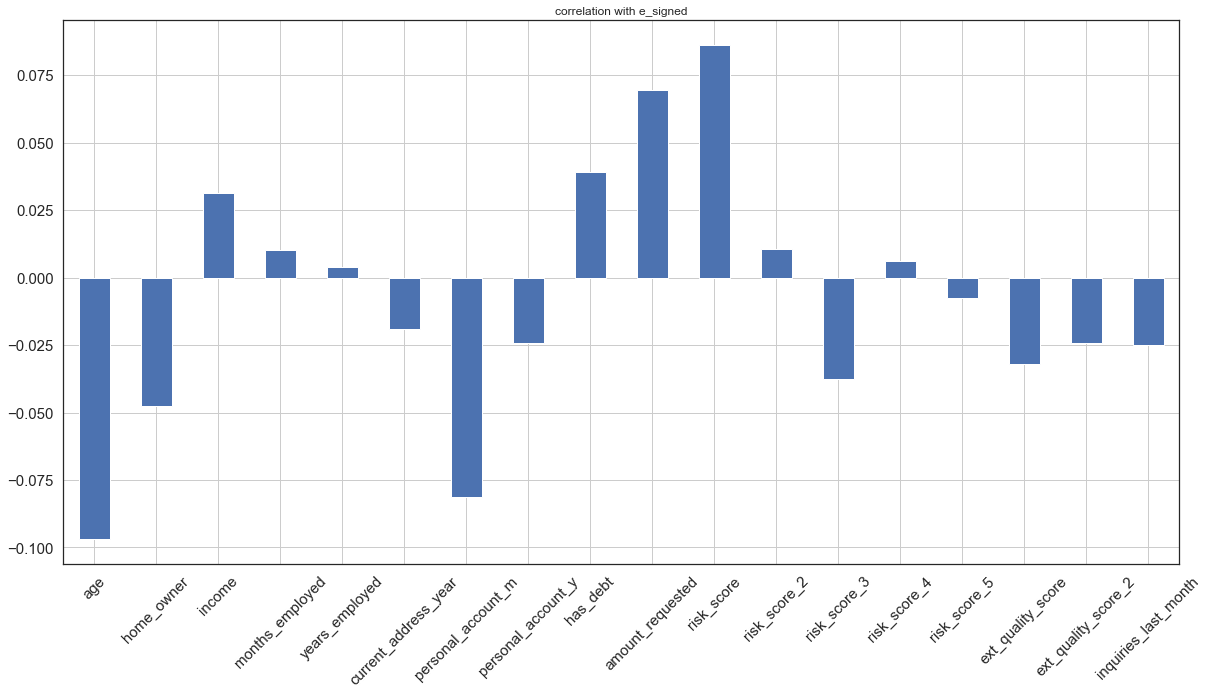

In [66]:
# correlation plot with Response Variable 
dataset2.corrwith(dataset.e_signed).plot.bar(
    figsize=(20,10),title="correlation with e_signed", fontsize=15,
    rot=45 , grid=True)

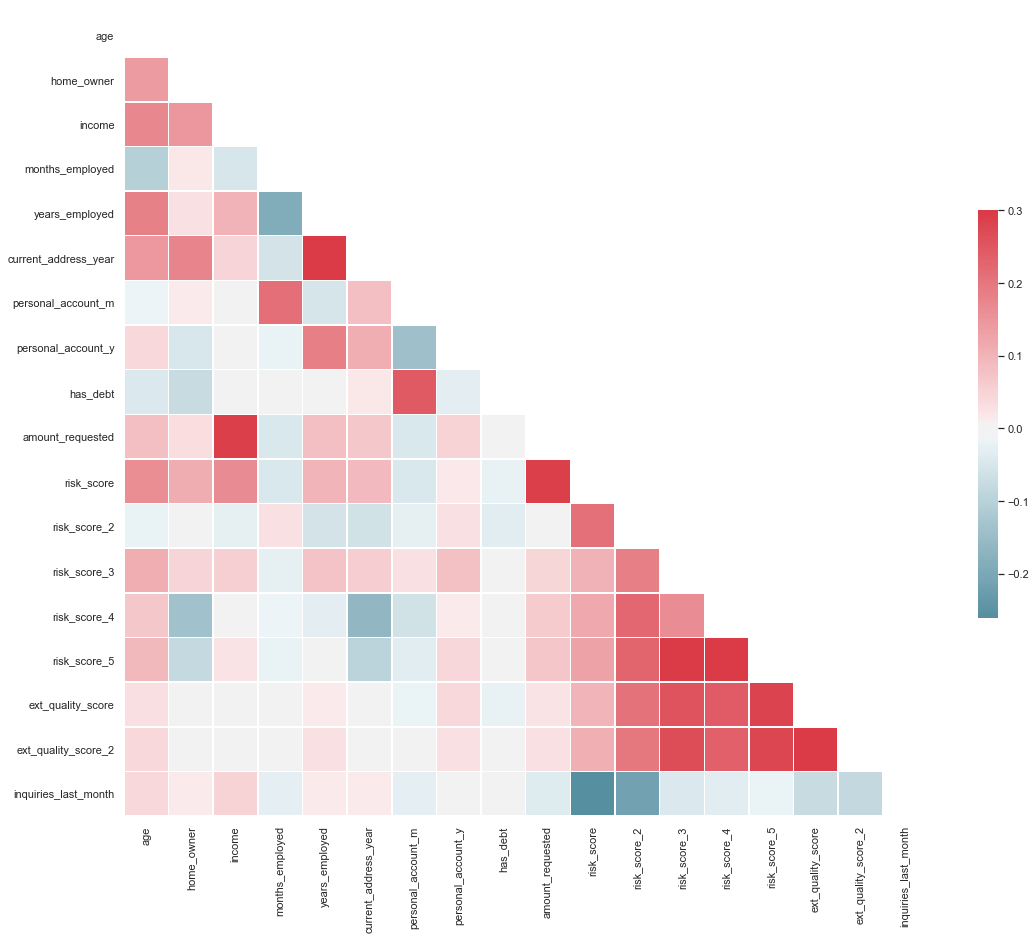

In [67]:
# correlation Matrix 
sn.set(style="white")
# compute the correlation matrix 
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask= np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(18,15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0, square=True, linewidths=0.5, cbar_kws={"shrink":.5})

In [68]:
# Feature engineering 
import random 
import time 

# to be able to replicate the result we are going to create a seed 
random.seed(100)

# Data preprocessing 

# Feature Engineering :
# in this case we will only remove one column cause it has no value to add to the model 

dataset = dataset.drop(columns=['months_employed'])
# we have two variable that do the  same action , which is calculate how many time the user 
# has had the account one per year and one per month 
# so we are going to drop them and create one column that sumup the two 



In [69]:
dataset['personal_account_months']=(dataset.personal_account_m + (dataset.personal_account_y *12))

dataset[['personal_account_m','personal_account_y','personal_account_months']].head()
dataset = dataset.drop(columns=['personal_account_m','personal_account_y'])

In [70]:
# one hot encoding 
# first we change the categorical variables into numerical ones
dataset = pd.get_dummies(dataset)
dataset.columns

# the dummy function create dependencies btwn the variable that it create with the original one 
# so we need to remove one 


Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [71]:
dataset = dataset.drop(columns=['pay_schedule_semi-monthly'])
# now we are going to remove tthe response variable 
response = dataset["e_signed"]
users = dataset['entry_id']

dataset = dataset.drop(columns=["e_signed","entry_id"])



In [72]:
# now the train test split 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(dataset,
                                                  response,
                                                  test_size=0.2,
                                                  random_state=0)

In [73]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [74]:
# the fit_transform let us lose index and columns 
# so we are gonna put in a pandas dataframe 
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
# we already fitted 
X_test2=pd.DataFrame(sc_X.transform(X_test))


c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\user\anaconda3\envs\python5\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [75]:
X_train2.columns= X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values


In [76]:
X_train = X_train2
X_test = X_test2

In [77]:
# Model Building process
# we are going to build different models to our dataset and compare the results 
# and then choose the one with the best results 

# logistic regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty='l1')
classifier.fit(X_train,y_train)

c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
# Predicting test set 
y_pred = classifier.predict(X_test)

In [79]:
# Evaluation
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score , precision_score, recall_score


In [80]:
acc = accuracy_score(y_test,y_pred)

In [81]:
prec = precision_score(y_test,y_pred) # gives us from all the positive predicition we did how many we did get right

In [82]:
rec = recall_score(y_test,y_pred) # out from the positive we predicted how many are actually true 

In [83]:
f1= f1_score(y_test,y_pred)

In [84]:
# we are gonna put the ressult in a panda dataframe
results=pd.DataFrame([['linear Regression (Lasso)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','F1 Score'])

In [85]:
# SVM linear
# Second Model L Classification model
# SVM : support Vector machine
from sklearn.svm import SVC
classifier = SVC(random_state=0,kernel='linear')
classifier.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [86]:
# Predicting test set
y_pred= classifier.predict(X_test)

In [87]:
#evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, f1_score, recall_score

In [88]:
acc= accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [89]:
# we are gonna put the ressult in a panda dataframe
model_results=pd.DataFrame([['SVM (Linear)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','F1 Score'])

In [90]:
results = results.append(model_results,ignore_index=True)


In [91]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354


In [92]:
#lets use another kernel 
from sklearn.svm import SVC
classifier = SVC(random_state=0,kernel='rbf')
classifier.fit(X_train,y_train)

# Predicting test set
y_pred= classifier.predict(X_test)

#evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, f1_score, recall_score
acc= accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
# we are gonna put the ressult in a panda dataframe
model_results1=pd.DataFrame([['SVM (rbf)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','F1 Score'])

results = results.append(model_results1,ignore_index=True)


In [93]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505


In [95]:
# Random Forest Model with 100 trees

#lets use another kernel 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0,n_estimators=100,
                              criterion='entropy')
classifier.fit(X_train,y_train)

# Predicting test set
y_pred= classifier.predict(X_test)

#evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, f1_score, recall_score
acc= accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
# we are gonna put the ressult in a panda dataframe
model_results1=pd.DataFrame([['RandomForestClassifier (n=100)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','F1 Score'])

results = results.append(model_results1,ignore_index=True)


In [96]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,RandomForestClassifier (n=100),0.621720,0.640098,0.678942,0.658948


In [ ]:
# we can see that RandomForest Model is the performing better than the others 
#f1 score shows that it is more balanced 
# the Accuracy has gone up which means that the model is more accurate 
# the precision has gone up 
# and the recall even with a little drop we still get a good portion of 
#good prediction 


In [97]:
# validate the model 
# first : K-fold cross validation 
# when we do k-fold cross validation we make sure that the result is 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train,cv=10)
print("Random Forest Classifier accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std()*2))

Random Forest Classifier accuracy: 0.63 (+/- 0.03)


In [ ]:
# now that we have chosen the model we want 
# we are going to fine the model 
# we are going to find the best parameters that helps us build our model 
# with the best accuracy 


In [103]:
#Grid Search
# in Random Forest we can use , entropy or gini
# now let us try entropy and gini 

# 1: Entropy 
parameters = {"max_depth":[3,None],
             "max_features":[1,5,10],
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,5,10],
             "bootstrap":[True,False],
             "criterion":["entropy"]}

In [104]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator=classifier,
                         param_grid=parameters,
                         scoring="accuracy",
                         cv=10,
                         n_jobs=-1)

In [105]:
# we want to know how long this takes 
t0= time.time()
grid_search= grid_search.fit(X_train,y_train)
t1=time.time()

print("took %0.2f seconds" %(t1-t0))

took 3056.34 seconds


In [106]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6356275303643725,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [ ]:
# Second Grid Search


In [107]:
# 1: Entropy 
parameters = {"max_depth":[None],
             "max_features":[3,5,7],
             'min_samples_split':[8,10,12],
             'min_samples_leaf':[1,2,3],
             "bootstrap":[True],
             "criterion":["entropy"]}

In [108]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator=classifier,
                         param_grid=parameters,
                         scoring="accuracy",
                         cv=10,
                         n_jobs=-1)

In [109]:
# we want to know how long this takes 
t0= time.time()
grid_search= grid_search.fit(X_train,y_train)
t1=time.time()

print("took %0.2f seconds" %(t1-t0))

took 676.72 seconds


In [110]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6356275303643725,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [ ]:
# the results are the same as for the first grid search 
# meaning the result we have is the optimal one 


In [111]:
# now lets try to predict the results with grid search and not classifier 
# Predicting test set
y_pred= grid_search.predict(X_test)

#evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, f1_score, recall_score
acc= accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
# we are gonna put the ressult in a panda dataframe
model_results1=pd.DataFrame([['RandomForestClassifier (n=100, GSx2 + Entropy)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','F1 Score'])

results = results.append(model_results1,ignore_index=True)


In [112]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,RandomForestClassifier (n=100),0.621720,0.640098,0.678942,0.658948
4,"RandomForestClassifier (n=100, GSx2 + Entropy)",0.635958,0.646617,0.713693,0.678501


In [ ]:
# Grid Search  gives us a better result than all the others 
# so far we tried this with the entropy option 
# lets try this with gini as well 


In [113]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 1326.49 seconds


(0.6363953650705012,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

In [114]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


Took 771.79 seconds


In [ ]:
# the main difference btwn entropy and gini is the splitting criteria 
# when splitting into child trees in the forst entropy favorise the informational content 
# and gini values miss-labeling it make sure it doesnt happen 

In [117]:
# End Of model
# Formatting Final Results

final_results = pd.concat([y_test,users], axis=1).dropna()
final_results['predictions']=y_pred
final_results=final_results[['entry_id','e_signed','predictions']]


In [118]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
31,2881357,0.0,0
33,7048193,1.0,1
37,5815308,1.0,1
44,8700190,1.0,1
45,8232654,0.0,1
